In [64]:
import pandas as pd
from transform import DataTransformation
from df_info import DataFrameInfo, Plotter
import missingno as msno
from skew import SkewTransform
import matplotlib.pyplot as plt
import pandas as pd
import gopy as go

In [65]:
def load_csv(data_csv):
    df = pd.read_csv(data_csv)
    return df
data_csv = 'data.csv'
df = load_csv(data_csv)

In [66]:
transformer  = DataTransformation(df)
df_info = DataFrameInfo(df)
df_plot = Plotter(df)

In [67]:
df[["term","employment_length","issue_date","earliest_credit_line","last_payment_date","next_payment_date", "last_credit_pull_date"]].head(10)

df = transformer.convert_term_float("term")
dates_convert_list = [
    "issue_date",
    "earliest_credit_line",
    "last_payment_date",
    "next_payment_date",
    "last_credit_pull_date"
]

# convert each date column
for date_column in dates_convert_list:
    transformer.dates_conversion(date_column)

current_changes = df[["term", "issue_date", "earliest_credit_line","next_payment_date", "last_payment_date", "last_credit_pull_date"]].head(10)

<Axes: >

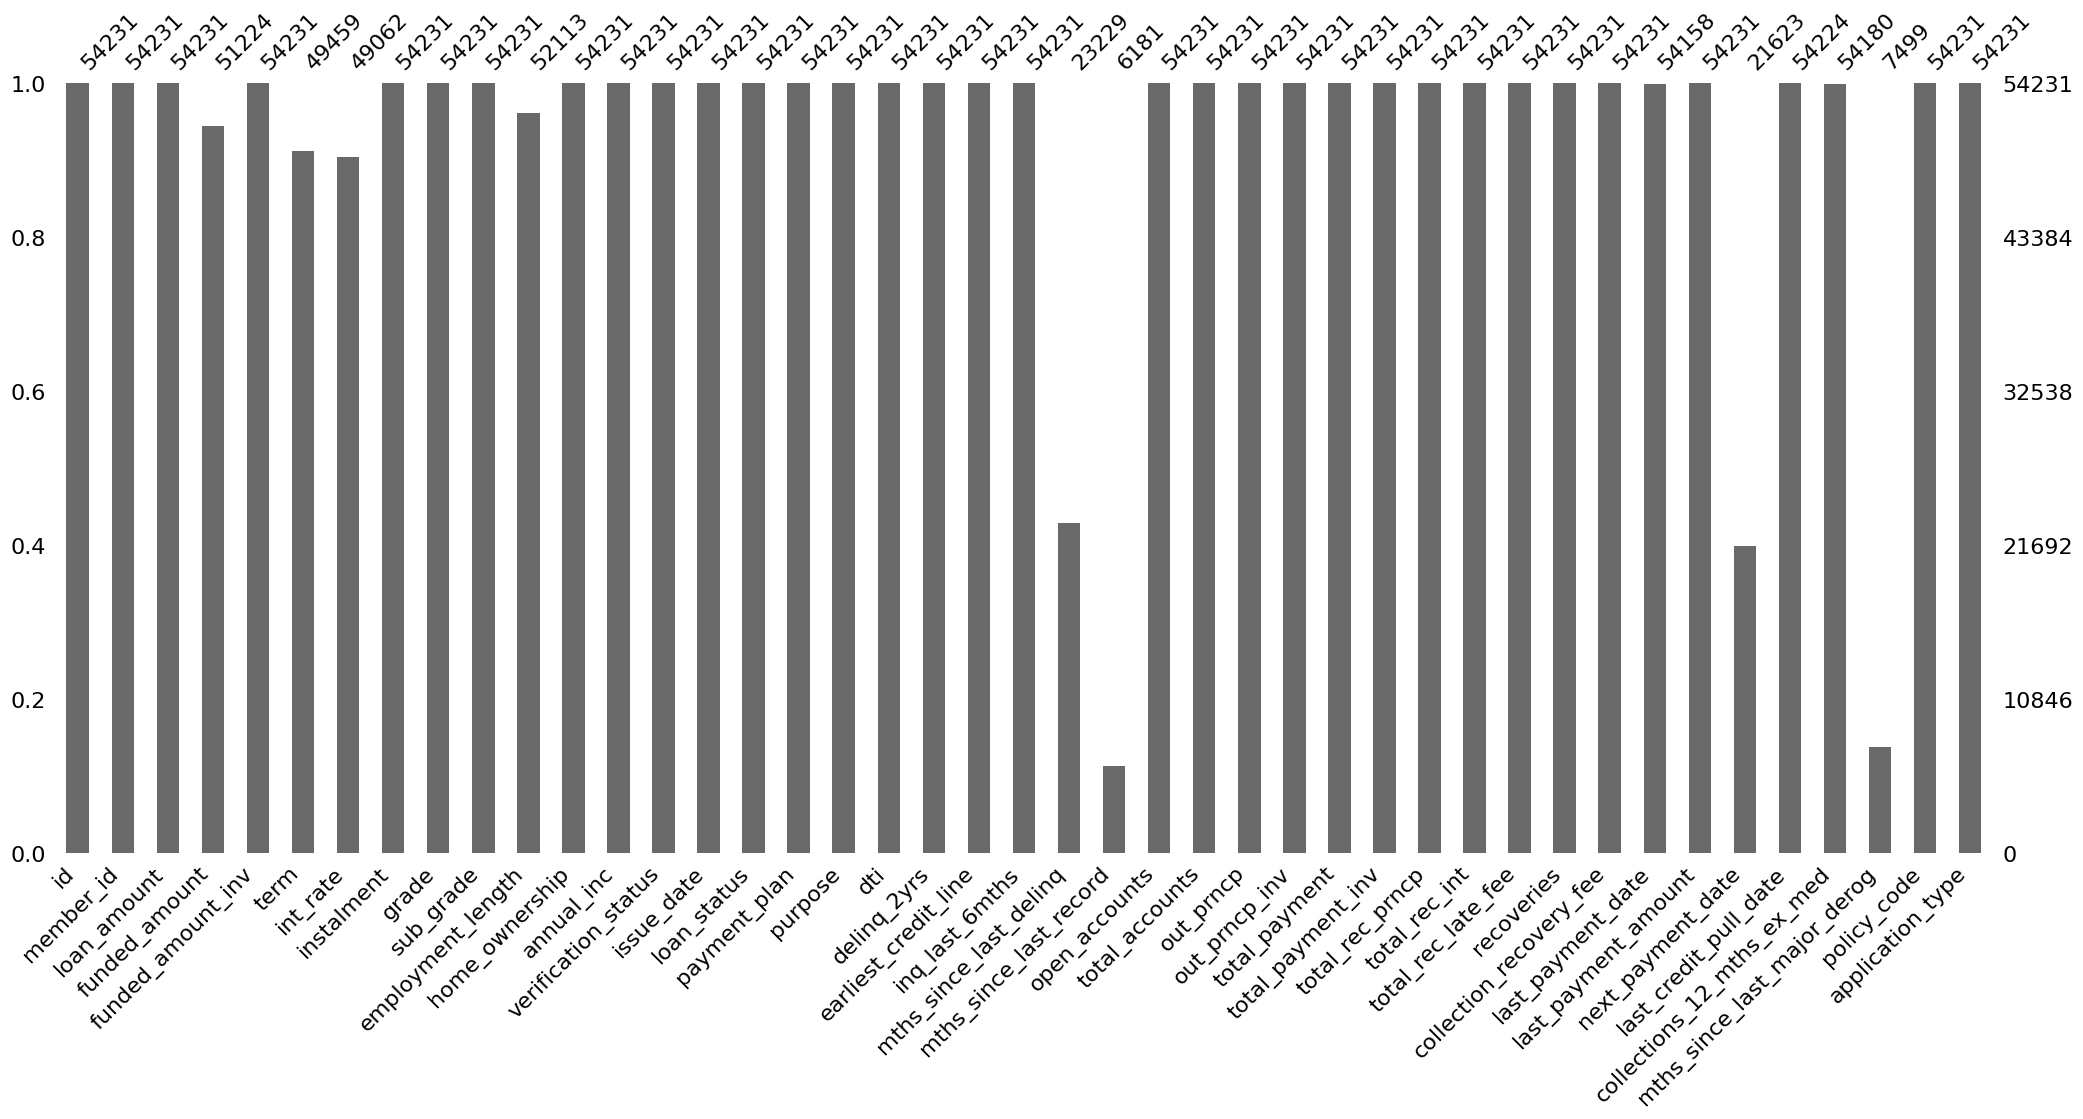

In [68]:
msno.bar(df)

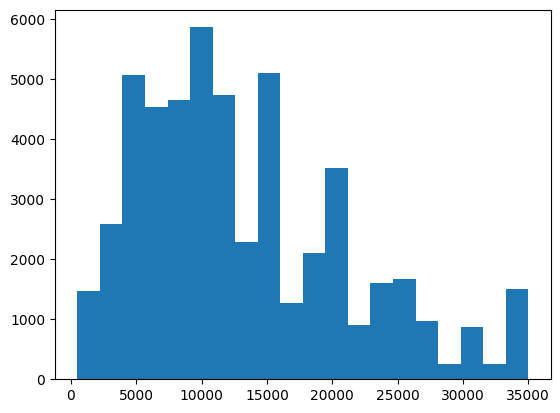

C:\Users\milan\AppData\Local\Temp\ipykernel_23136\1912314471.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["term"].fillna(term_mode, inplace=True)


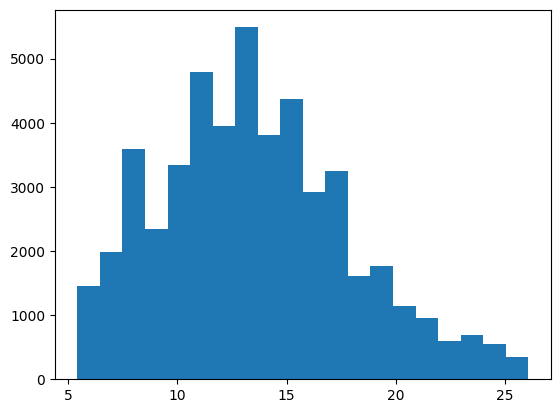

0.411540039874641


In [69]:
transformer.drop_column([ "mths_since_last_delinq", "mths_since_last_record", "next_payment_date", "mths_since_last_major_derog"])
df_plot.histogram('funded_amount', 20)

df["funded_amount"] = df["funded_amount"].fillna(df["loan_amount"])
term_mode = df["term"].mode().iloc[0]

df["term"].fillna(term_mode, inplace=True)
df = df.dropna(subset=['last_payment_date', 'last_credit_pull_date',
       'collections_12_mths_ex_med'])
df_info = DataFrameInfo(df)
df_plot = Plotter(df)

df_info.get_missing_values()

df_plot = Plotter(df)
df_plot.histogram('int_rate', 20)

skew_df = df['int_rate'].skew()
print(skew_df)

In [70]:
df['int_rate'].mean()
df["int_rate"] = df["int_rate"].fillna(df["int_rate"].mean())
df['int_rate'].head(50)


C:\Users\milan\AppData\Local\Temp\ipykernel_23136\1194472162.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["int_rate"] = df["int_rate"].fillna(df["int_rate"].mean())


0      7.490000
1      6.990000
2      7.490000
3     14.310000
4      6.030000
5     11.440000
6     21.990000
7     19.990000
8     12.990000
9      8.190000
10     8.190000
11    10.490000
12    12.390000
13     6.990000
14    13.660000
15    13.507936
16     8.190000
17    13.660000
18    12.390000
19    13.507936
20     6.990000
21    22.990000
22    15.990000
23    19.990000
24    12.990000
25    24.990000
26    19.990000
27     9.490000
28     6.990000
29    21.990000
30    15.590000
31    10.490000
32    14.310000
33    19.240000
34     6.490000
35    16.490000
36    12.390000
37    19.240000
38    17.140000
39    14.310000
40    18.540000
41     8.190000
42     8.670000
43    12.990000
44    12.390000
45    15.590000
46    18.540000
47    11.440000
48    18.540000
49    15.590000
Name: int_rate, dtype: float64

[[<Axes: title={'center': 'id'}> <Axes: title={'center': 'member_id'}>
  <Axes: title={'center': 'loan_amount'}>
  <Axes: title={'center': 'funded_amount'}>
  <Axes: title={'center': 'funded_amount_inv'}>]
 [<Axes: title={'center': 'term'}> <Axes: title={'center': 'int_rate'}>
  <Axes: title={'center': 'instalment'}>
  <Axes: title={'center': 'annual_inc'}>
  <Axes: title={'center': 'issue_date'}>]
 [<Axes: title={'center': 'dti'}> <Axes: title={'center': 'delinq_2yrs'}>
  <Axes: title={'center': 'earliest_credit_line'}>
  <Axes: title={'center': 'inq_last_6mths'}>
  <Axes: title={'center': 'open_accounts'}>]
 [<Axes: title={'center': 'total_accounts'}>
  <Axes: title={'center': 'out_prncp'}>
  <Axes: title={'center': 'out_prncp_inv'}>
  <Axes: title={'center': 'total_payment'}>
  <Axes: title={'center': 'total_payment_inv'}>]
 [<Axes: title={'center': 'total_rec_prncp'}>
  <Axes: title={'center': 'total_rec_int'}>
  <Axes: title={'center': 'total_rec_late_fee'}>
  <Axes: title={'cente

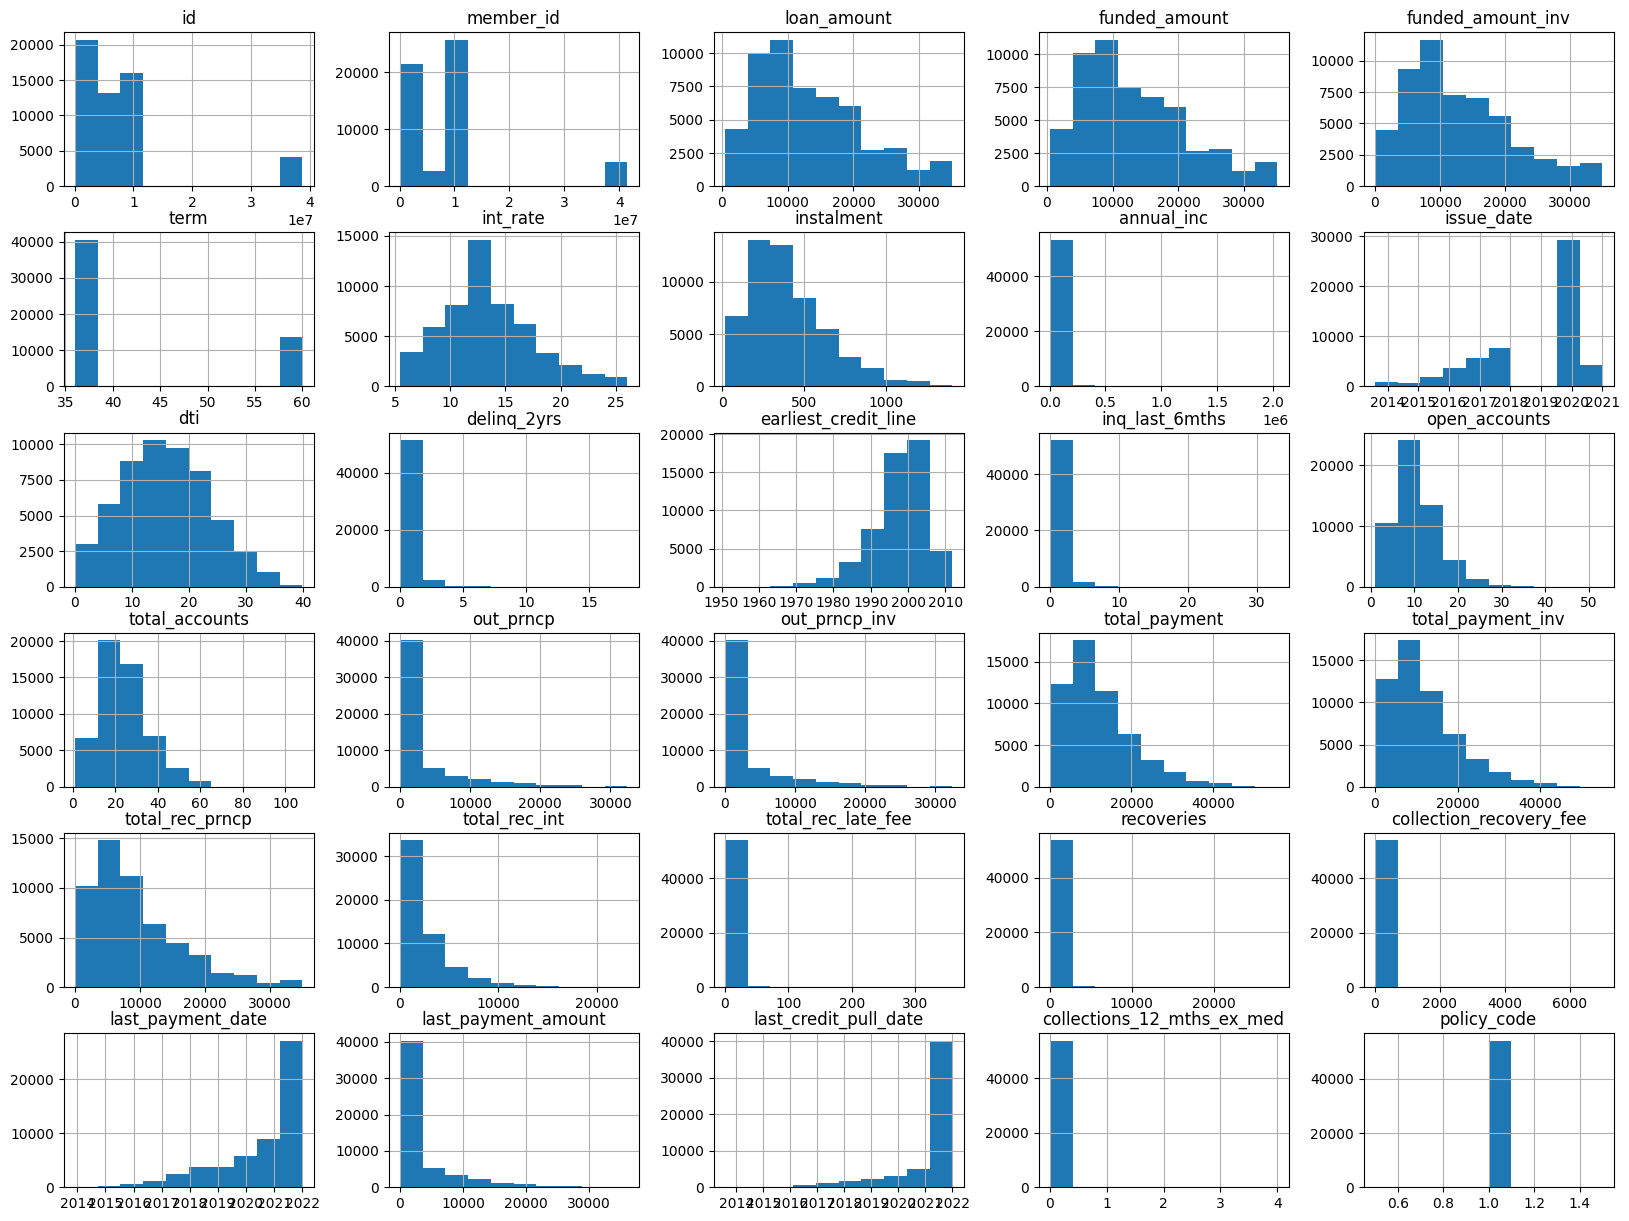

In [71]:
print(df.hist(figsize=(20,15)))

In [72]:
df[['loan_amount', 'funded_amount', 'funded_amount_inv', 'instalment', 'open_accounts', 'total_accounts','out_prncp','out_prncp_inv', 'total_payment', 'total_payment_inv', 'total_rec_prncp', 'total_rec_int', 'last_payment_amount']].skew(numeric_only=False)

loan_amount            0.804312
funded_amount          0.819681
funded_amount_inv      0.814251
instalment             0.996150
open_accounts          1.059493
total_accounts         0.780083
out_prncp              2.352526
out_prncp_inv          2.352946
total_payment          1.269266
total_payment_inv      1.258474
total_rec_prncp        1.262007
total_rec_int          2.203625
last_payment_amount    2.496079
dtype: float64

In [73]:
transformed_df1 = SkewTransform(df)
transformed_df = transformed_df1
transformed_df.transform_log()

skew_df = df.skew(numeric_only=True).to_frame().reset_index()
skew_df = skew_df.loc[abs(skew_df[0]) >= 0.5]
skew_df

c:\Milan\Career\Self-Study\Ai Core\Exploratory Data Analysis - Customer Loans in Finance\main\skew.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df[column] = self.df[column].map(lambda i: np.log1p(i) if i > 0 else 0)


,index,0
2,loan_amount,0.804312
3,funded_amount,0.819681
4,funded_amount_inv,0.814251
5,term,1.146332
7,instalment,0.996150
10,delinq_2yrs,2.559202
11,inq_last_6mths,0.701589
12,open_accounts,1.059493
13,total_accounts,0.780083
14,out_prncp,0.573207


array([[<Axes: title={'center': 'loan_amount'}>,
        <Axes: title={'center': 'funded_amount'}>,
        <Axes: title={'center': 'funded_amount_inv'}>,
        <Axes: title={'center': 'instalment'}>],
       [<Axes: title={'center': 'open_accounts'}>,
        <Axes: title={'center': 'total_accounts'}>,
        <Axes: title={'center': 'out_prncp'}>,
        <Axes: title={'center': 'out_prncp_inv'}>],
       [<Axes: title={'center': 'total_payment'}>,
        <Axes: title={'center': 'total_payment_inv'}>,
        <Axes: title={'center': 'total_rec_prncp'}>,
        <Axes: title={'center': 'total_rec_int'}>],
       [<Axes: title={'center': 'last_payment_amount'}>, <Axes: >,
        <Axes: >, <Axes: >]], dtype=object)

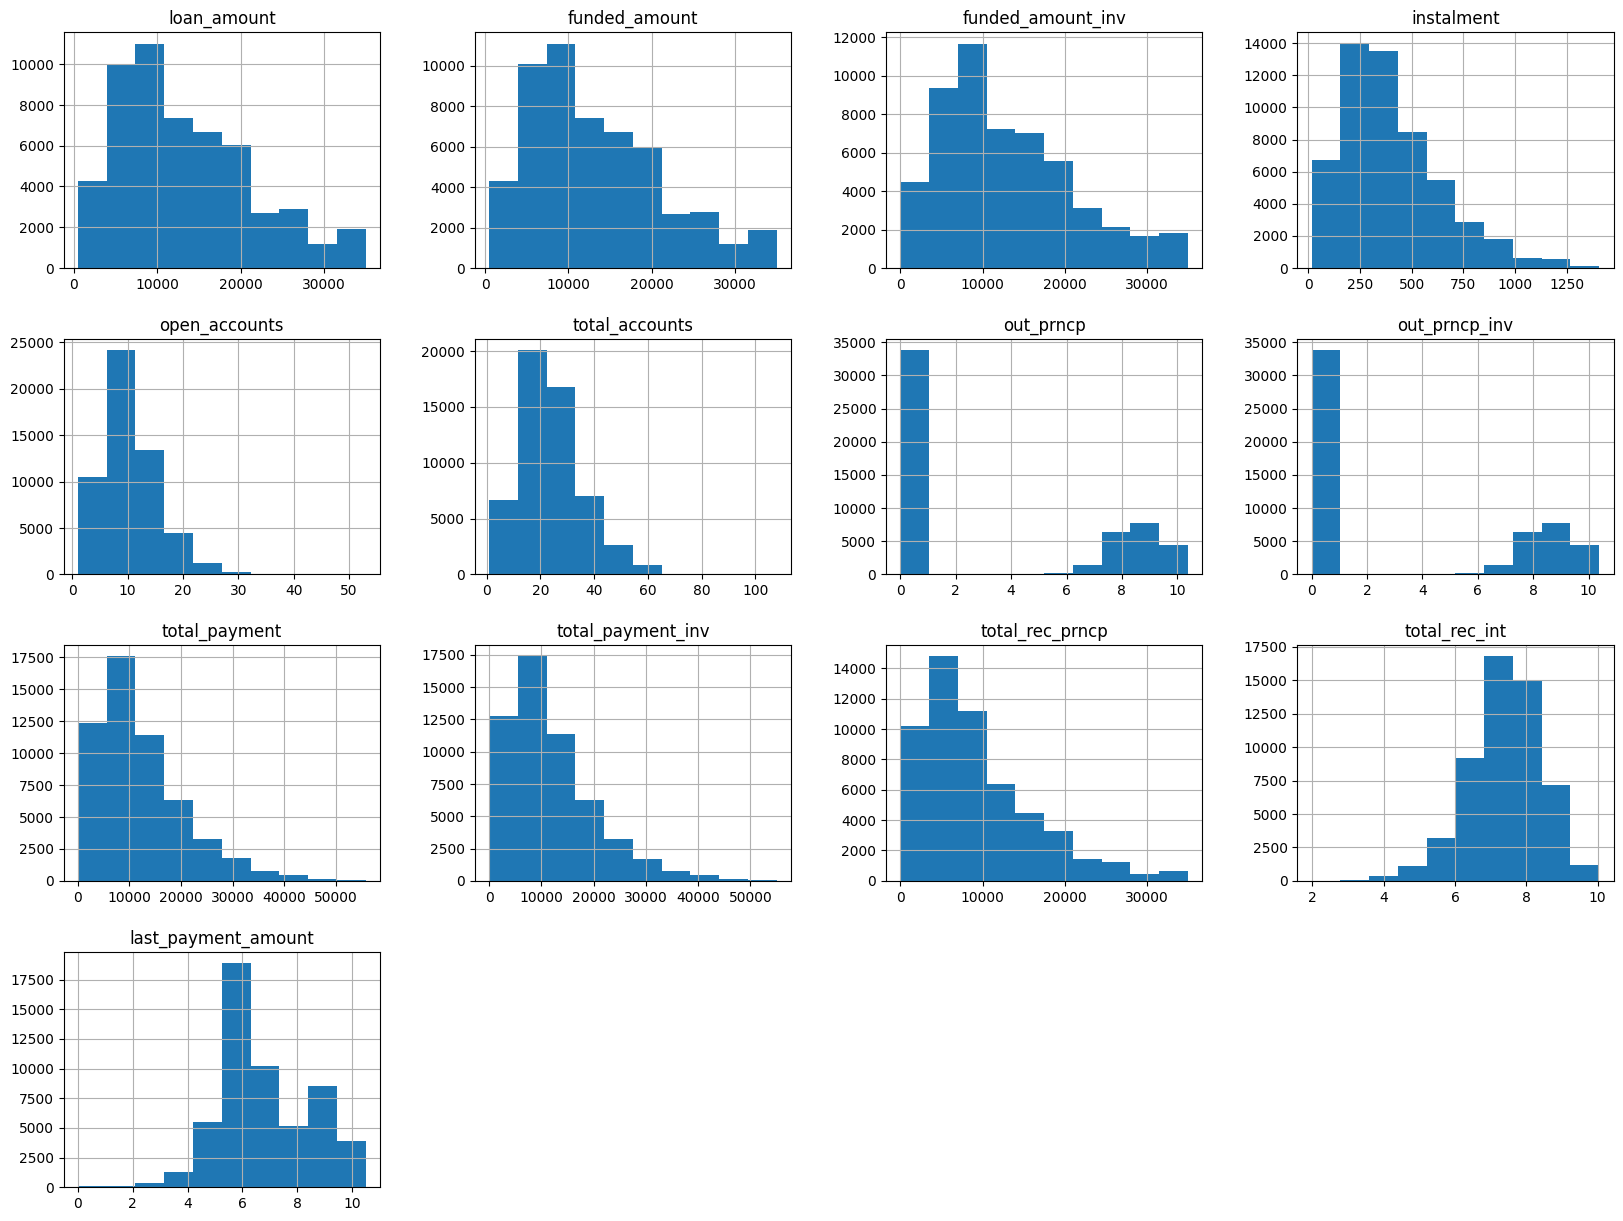

In [74]:
df[['loan_amount', 'funded_amount', 'funded_amount_inv', 'instalment',
         'open_accounts', 'total_accounts', 'out_prncp', 'out_prncp_inv', 
        'total_payment', 'total_payment_inv', 'total_rec_prncp',
        'total_rec_int', 'last_payment_amount']].hist(figsize=(20,15))

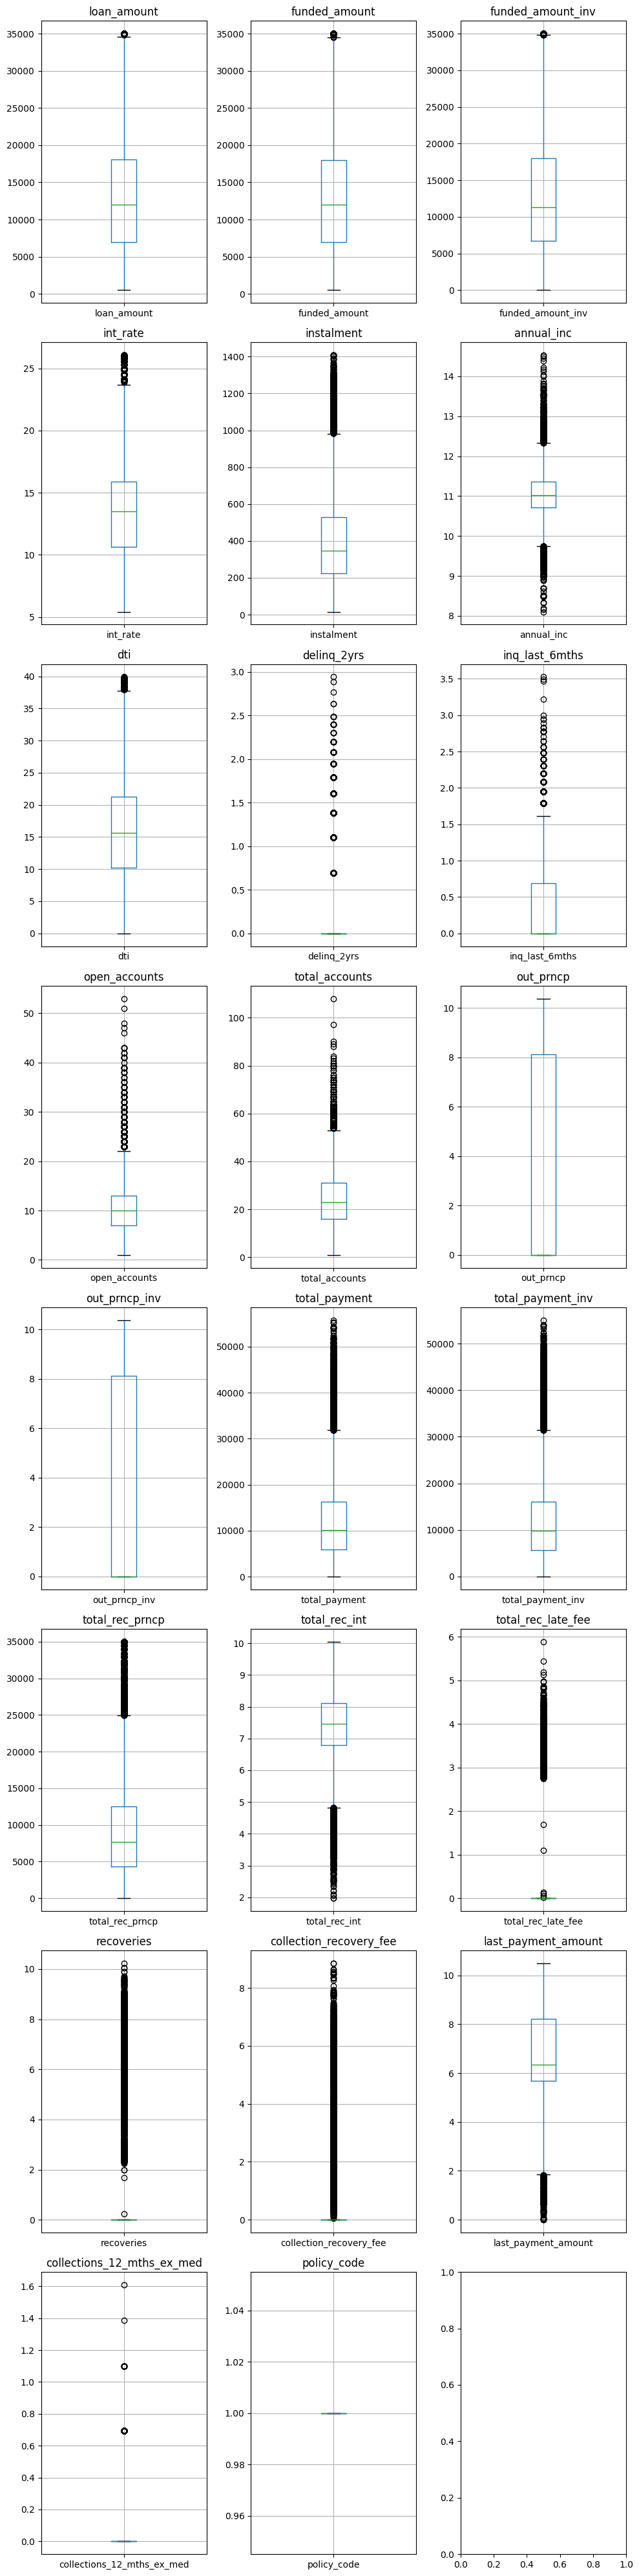

In [75]:
df[['loan_amount', 'funded_amount', 'funded_amount_inv', 'instalment', 'open_accounts', 'total_accounts','out_prncp','out_prncp_inv', 'total_payment', 'total_payment_inv', 'total_rec_prncp', 'total_rec_int', 'last_payment_amount']].skew(numeric_only=False)

columns = ['loan_amount', 'funded_amount', 'funded_amount_inv', 'int_rate', 'instalment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_accounts', 'total_accounts', 'out_prncp', 'out_prncp_inv', 'total_payment', 'total_payment_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee','last_payment_amount', 'collections_12_mths_ex_med', 'policy_code']

fig, axes = plt.subplots(nrows=8, ncols=3, figsize=(10, 40))
axes = axes.flatten()

for idx, column in enumerate(columns):
    df.boxplot(column=column, ax=axes[idx])
    axes[idx].set_title(column)

plt.tight_layout()
plt.show()

In [76]:

def remove_outliers_for_column(df, column, threshold=2):
    z_scores = (df[column] - df[column].mean()) / df[column].std()
    outliers = z_scores.abs() > threshold
    df_outliers = df[outliers]
    return df_outliers

df_outliers = remove_outliers_for_column(df, 'total_accounts')
df_outliers = remove_outliers_for_column(df, 'inq_last_6mths')

skew_df = df_outliers[["total_accounts", "inq_last_6mths"]].skew(numeric_only=True).to_frame().reset_index()
skew_df

,index,0
0,total_accounts,0.634160
1,inq_last_6mths,2.379883


In [77]:
df['loan_status'].value_counts()

charged_off_loans = df[df['loan_status'] == 'Charged Off']
charged_off_percentage = (charged_off_loans.shape[0] / df.shape[0]) * 100
total_amount_paid_charged_off = charged_off_loans['total_payment'].sum()

print(f"Percentage of charged-off loans historically: {charged_off_percentage:.2f}%")
print(f"Total paid for charged-off loans: £{total_amount_paid_charged_off:.2f}")

Percentage of charged-off loans historically: 10.17%
Total paid for charged-off loans: £37282284.32


In [95]:
charged_off_loans.head()


,id,member_id,loan_amount,funded_amount,funded_amount_inv,term,int_rate,instalment,grade,sub_grade,...,recoveries,collection_recovery_fee,last_payment_date,last_payment_amount,last_credit_pull_date,collections_12_mths_ex_med,policy_code,application_type,remaining_term,remaining_loss
7,17.470214,17.539754,26500,26500.0,26200.0,36.0,19.99,701.95,E,E3,...,0.000000,0.000000,2021-08-01,6.555286,2022-01-01,0.0,1,INDIVIDUAL,26500.0,0.000000
56,17.470182,17.539723,11200,11200.0,11200.0,60.0,16.49,275.29,D,D3,...,0.000000,0.000000,2021-08-01,5.621451,2022-01-01,0.0,1,INDIVIDUAL,11200.0,0.000000
83,17.469952,17.539510,1325,1325.0,1325.0,36.0,17.14,47.34,D,D4,...,0.000000,0.000000,2021-07-01,3.878259,2022-01-01,0.0,1,INDIVIDUAL,1325.0,0.000000
90,17.469946,17.539504,8150,8150.0,8150.0,36.0,19.99,302.85,E,E3,...,0.000000,0.000000,2021-07-01,5.716534,2021-12-01,0.0,1,INDIVIDUAL,8150.0,0.000000
117,17.469925,17.539483,7000,7000.0,7000.0,36.0,12.99,235.83,C,C2,...,7.084712,5.373723,2021-03-01,5.467343,2021-08-01,0.0,1,INDIVIDUAL,7000.0,12.458436


Total Projected Loss of Charged Off Loans: £31816.80


C:\Users\milan\AppData\Local\Temp\ipykernel_23136\2254068960.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  charged_off_loans['remaining_loss'] = charged_off_loans['recoveries'] +  charged_off_loans['collection_recovery_fee']
C:\Users\milan\AppData\Local\Temp\ipykernel_23136\2254068960.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  charged_off_loans['remaining_term'] = charged_off_loans['loan_amount'] / charged_off_loans['instalment']


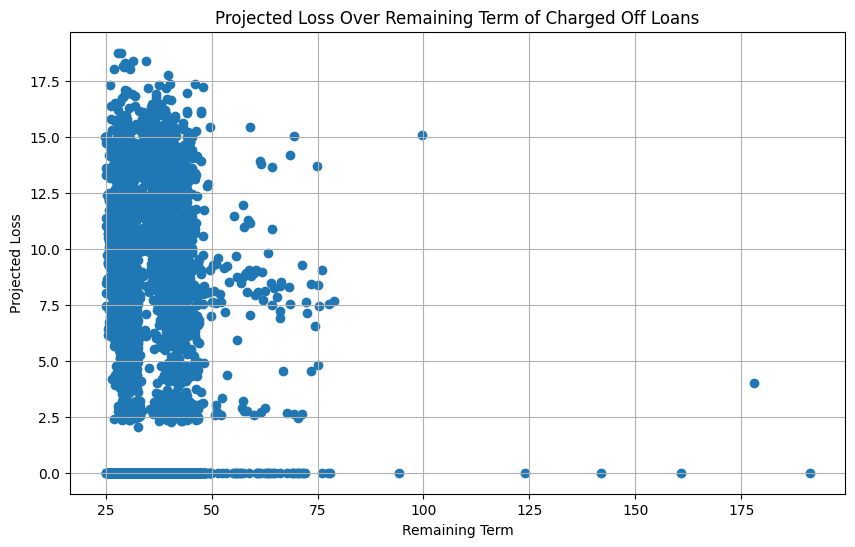

In [99]:
charged_off_loans['remaining_loss'] = charged_off_loans['recoveries'] +  charged_off_loans['collection_recovery_fee']
total_projected_loss = charged_off_loans['remaining_loss'].sum()

print(f"Total Projected Loss of Charged Off Loans: £{total_projected_loss:.2f}")

charged_off_loans['remaining_term'] = charged_off_loans['loan_amount'] / charged_off_loans['instalment']

plt.figure(figsize=(10, 6))
plt.scatter(charged_off_loans['remaining_term'], charged_off_loans['remaining_loss'])
plt.title('Projected Loss Over Remaining Term of Charged Off Loans')
plt.xlabel('Remaining Term')
plt.ylabel('Projected Loss')
plt.grid(True)
plt.show()

In [100]:
late_payments = df[df['loan_status'] == 'Late']

percentage_late_payments = (len(late_payments) / len(df)) * 100
print(f"Percentage of customers currently late on payments: {percentage_late_payments:.2f}%")

total_late_customers = len(late_payments)

loss_if_charged_off = late_payments['recoveries'].sum() + late_payments['collection_recovery_fee'].sum()
print(f"Total loss if customers' status changed to Charged Off: ${loss_if_charged_off:.2f}")

projected_loss_if_finished = late_payments['loan_amount'].sum() - late_payments['total_rec_prncp'].sum()
print(f"Projected loss if customers finish their loan terms: ${projected_loss_if_finished:.2f}")

total_revenue = df['loan_amount'].sum()
late_payment_default_revenue = (loss_if_charged_off + projected_loss_if_finished) / total_revenue * 100
print(f"Percentage of total expected revenue from late payments and defaults: {late_payment_default_revenue:.2f}%")

Percentage of customers currently late on payments: 0.00%
Total loss if customers' status changed to Charged Off: $0.00
Projected loss if customers finish their loan terms: $0.00
Percentage of total expected revenue from late payments and defaults: 0.00%


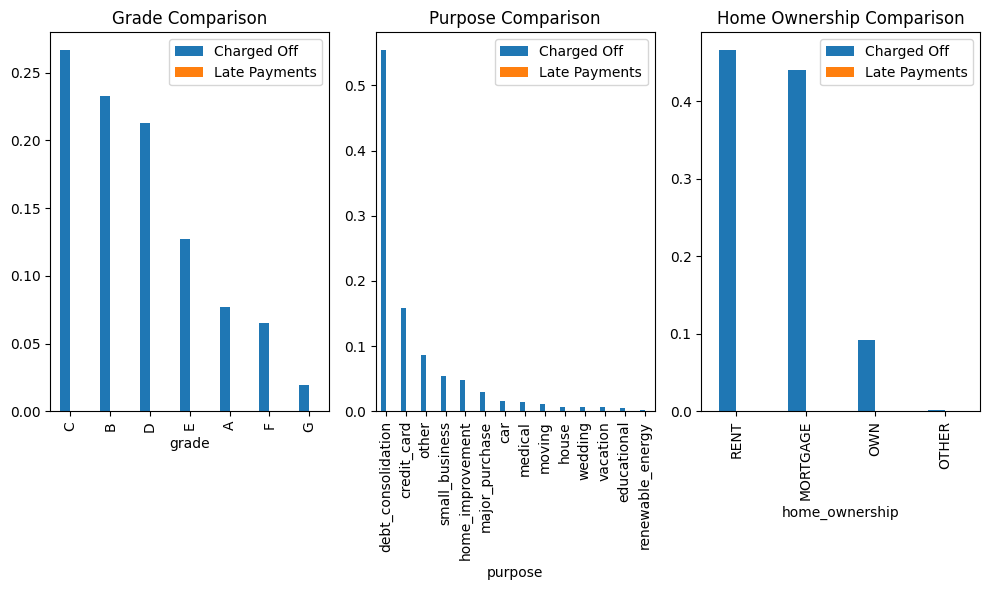

In [81]:
charged_off = df[df['loan_status'] == 'Charged Off']
late_payments = df[df['loan_status'] == 'Late']

grade_comparison = pd.concat([charged_off['grade'].value_counts(normalize=True), late_payments['grade'].value_counts(normalize=True)], axis=1)
grade_comparison.columns = ['Charged Off', 'Late Payments']

purpose_comparison = pd.concat([charged_off['purpose'].value_counts(normalize=True), late_payments['purpose'].value_counts(normalize=True)], axis=1)
purpose_comparison.columns = ['Charged Off', 'Late Payments']

home_comparison = pd.concat([charged_off['home_ownership'].value_counts(normalize=True), late_payments['home_ownership'].value_counts(normalize=True)], axis=1)
home_comparison.columns = ['Charged Off', 'Late Payments']



plt.figure(figsize=(10, 6))

plt.subplot(1, 3, 1)
grade_comparison.plot(kind='bar', ax=plt.gca())
plt.title('Grade Comparison')

plt.subplot(1, 3, 2)
purpose_comparison.plot(kind='bar', ax=plt.gca())
plt.title('Purpose Comparison')

plt.subplot(1, 3, 3)
home_comparison.plot(kind='bar', ax=plt.gca())
plt.title('Home Ownership Comparison')

plt.tight_layout()
plt.show()